# Hypothesis Testing  
Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data.  Hypothesis Testing is basically an assumption that we make about the population parameter

The actual test begins by considering two hypotheses. They are called the null hypothesis and the alternative hypothesis. These hypotheses contain opposing viewpoints.

<b>H0:</b> The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

<b>Ha:</b> The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

<b>Steps to perform Hypothesis testing</b>  
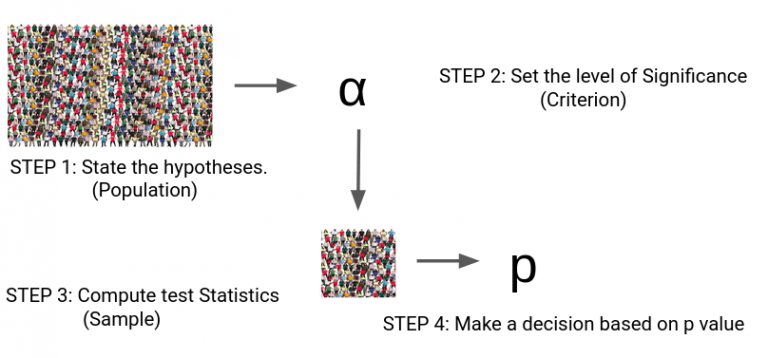

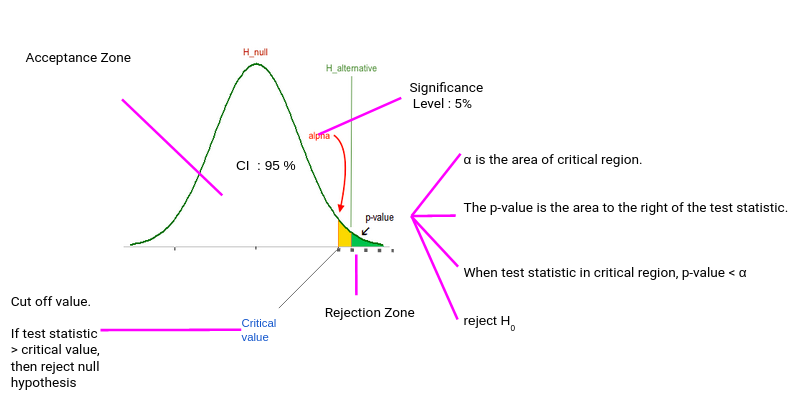  
Typically, we set the Significance level at 10%, 5%, or 1%. If our test score lies in the Acceptance Zone we fail to reject the Null Hypothesis. If our test score lies in the critical zone, we reject the Null Hypothesis and accept the Alternate Hypothesis.

<b>But why do we need p-value when we can reject/accept hypotheses based on test scores and critical value?</b>

p-value has the benefit that we only need one value to make a decision about the hypothesis. We don’t need to compute two different values like critical value and test scores. Another benefit of using p-value is that we can test at any desired level of significance by comparing this directly with the significance level.



#### Directional Hypothesis  
In the Directional Hypothesis, the null hypothesis is rejected if the test score is too large (for right-tailed and too small for left tailed). Thus, the rejection region for such a test consists of one part, which is right from the center.  

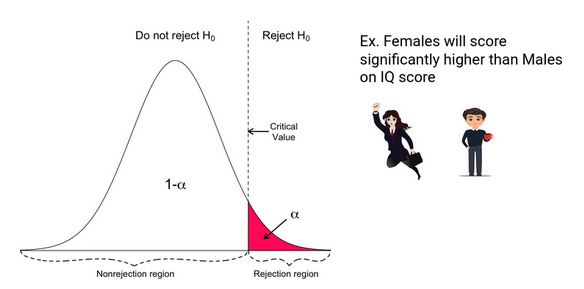



#### Non-Directional Hypothesis
In a Non-Directional Hypothesis test, the Null Hypothesis is rejected if the test score is either too small or too large. Thus, the rejection region for such a test consists of two parts: one on the left and one on the right.  

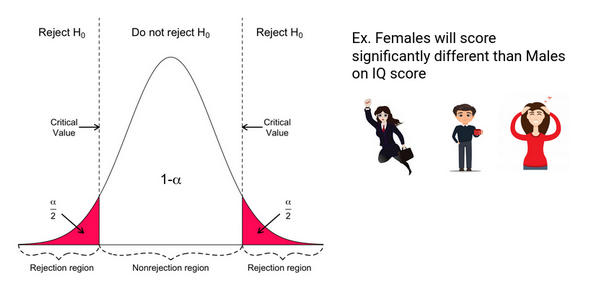

## One Sample Significance Tests

The purpose of One Sample Significance Tests is to check if a sample of observations could have been generated by a process with a specific mean or proportion.

Some questions that can be answered by one sample significance tests are:
* Is there equal representation of men and women in a particular industry?
* Is the normal human body temperature 98.6 F?

We will try and apply this test to a few real world problems in this notebook.

The Suicide dataset was obtained from Kaggle courtesy Rajanand Illangovan. You can download it here: https://www.kaggle.com/rajanand/suicides-in-india

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

### Analyzing Suicides in India by Gender

Are men as likely to commit suicide as women?

This is the question we will attempt at answering in this section. To answer this question, we will use suicide statistics shared by the National Crime Records Bureau (NCRB), Govt of India. To perform this analysis, we need to know the sex ratio in India. The Census 2011 report states that there are 940 females for every 1000 males in India.

Let p denote the fraction of women in India.

In [2]:
p = 940/(940+1000)
p

0.4845360824742268

If there is no correlation between gender and suicide, then the sex ratio of people committing suicides should closely reflect that of the general population. 

Let us now get our data into a Pandas dataframe for analysis.

In [3]:
df = pd.read_csv('data/suicides.csv')
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
df.shape

(237519, 7)

In [5]:
df['Gender'].value_counts()

Male      118879
Female    118640
Name: Gender, dtype: int64

We can see that the number of female suicides is slightly lesser than the number of male suicides. There are also fewer females than males. How do we prove that females are as likely to commit suicide as males? This can be answered through hypothesis testing.|

#### Step 1: Formulate the hypothesis and decide on confidence level

The null hypothesis, as stated in the slides, is the default state. Therefore, I will state my null and alternate hypothesis as follows.

* **Null Hypothesis (H0)**: Men and women are equally likely to commit suicide.
* **Alternate Hypothesis (H1)**: Men and women are not equally likely to commit suicide.

If the null hypothesis is true, it would mean that the fraction of women committing suicide would be the same as the fraction of women in the general population. We now need to use a suitable statisticaltest to find out if this is indeed is the case.

Our statistical test will generate a p-value which has to be compared to a significance level ($\alpha$). If p is less than alpha, then it is extremely unlikely that the event must have occurred by chance and we would be reasonable in rejecting the null hypothesis. On the contrary, if the p-value is higher than $\alpha$, we will not be in a position to reject the null hypothesis.

Let us assume, $\alpha$ = 0.05

#### Step 2: Decide on the Statsitical Test

We will be using the One Sample Z-Test here. How to decide upon a test will be discussed in another notebook.

#### Step 3: Compute the p-value

In [6]:
h0_prop = p
h0_prop

0.4845360824742268

In [7]:
h1_prop = df['Gender'].value_counts()['Female']/len(df)
h1_prop

0.49949688235467476

In [8]:
sigma_prop = np.sqrt((h0_prop * (1 - h0_prop))/len(df))
sigma_prop

0.0010254465276083747

In [9]:
z = (h1_prop - h0_prop)/sigma_prop
z

14.589546580591277

In [10]:
def pvalue(z):
    return 2 * (1 - stats.norm.cdf(z))

In [11]:
p_val = (1-stats.norm.cdf(z))*2
p_val

0.0

The p value is so small that Python has effectively rounded it to zero.

#### Step 4: Comparison and Decision

The p value obtained is extremely strong evidence to suggest that it is much lower than our significance level $\alpha$. We can thus safely disregard the null hypothesis and accept the alternate hypothesis (since it is the negation of the null hypothesis).

**Men and women are not equally likely to commit suicide.**

Note that this test says nothing about if men are more likely than women to commit suicide or vice versa. It just states that they are not equally likely. You are encouraged to form their own hypothesis tests to check these results.

### Analyzing the average heights of NBA Players

I was interested in knowing the average height of NBA playes. A quick Google search tells me that the average height of players between 1985-2006 was **6'7"** or 200.66 cm. Is this still the case?

To answer this question, we will be using the NBA Players Stats - 2014-2015 dataset on Kaggle courtesy DrGuillermo. The dataset can be downloaded here: https://www.kaggle.com/drgilermo/nba-players-stats-20142015

In [12]:
df2 = pd.read_csv('data/players_stats.csv')
df2.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [13]:
df2.shape

(490, 34)

#### Hypothesis Testing

One Sample Significance Test for Mean is extremely similar to that for Proportion. We will go through almost an identical process.

The hypotheses are defined as follows:
* **Null Hypothesis**: The average height of an NBA player is 200.66 cm.
* **Alternate Hypothesis**: The average height of an NBA player is not 200.66 cm.

Significance Level, $\alpha$ is at 0.05. Assuming Null Hypothesis to be true.

In [14]:
h0_mean = 200.66

In [15]:
h1_mean = df2['Height'].mean()
h1_mean

197.44075829383885

In [16]:
sigma = df2['Height'].std()/np.sqrt(len(df2))
sigma

0.3948442447237618

In [17]:
z = (h1_mean - h0_mean)/sigma
z

-8.15319394718129

In [18]:
p_val = (1 - stats.norm.cdf(abs(z))) * 2
p_val

4.440892098500626e-16

The p value obtained is much lesser than the significance level $\alpha$. We therefore reject the null hypothesis and accept the alternate hypothesis (the negation). We can therefore arrive at the following conclusion from this analysis:

**The average height of NBA Players is NOT 6'7"**.

## Two Sample Significance Tests

In the last section, we saw how one sample significance tests could be used to test if the proportion or the mean of a certain feature of a population is equal to a predefined proportion or mean respectively. In other words, we were comparing A sample with a prdefined value.

Two sample significance tests, on the other hand, allow us to compare two different populations and check if there is any meaningful difference in their means or proportions. The steps involved and the tools used are almost identical to the one sample significance test with one critical difference. The null hypothesis mean or proportion is assumed to be the difference of the means or proportions of the two populations and is set to zero.

Using two sample significance tests, we can answer questions such as:
* Is there racial discrimination when it comes to recruitment for white collar jobs?
* Is there a pay gap between men and women in the industry? Are women, on average, paid less?
* Do some universities involve in conscious racial discrimination? That is, are they more inclined to accept a student of a particular race as compared to another?

### Analyzing Literacy Rates

In this section, we will try and compare the literacy rates in the major areas of Punjab and Delhi ICT and discern if there is any meaningful difference between the two aforementioned quantities.

To answer this question, we will be using the 'Top 500 Indian Cities' dataset made available on Kaggle courtesy Arijit Mukherjee. The dataset can be found here: https://www.kaggle.com/zed9941/top-500-indian-cities

In [19]:
df3 = pd.read_csv('data/cities.csv')
df3.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [20]:
df3['state_name'].value_counts()

UTTAR PRADESH                63
WEST BENGAL                  61
MAHARASHTRA                  43
ANDHRA PRADESH               42
TAMIL NADU                   32
MADHYA PRADESH               32
GUJARAT                      29
RAJASTHAN                    29
KARNATAKA                    26
BIHAR                        26
HARYANA                      20
PUNJAB                       16
NCT OF DELHI                 15
JHARKHAND                    10
ORISSA                       10
CHHATTISGARH                  9
KERALA                        7
UTTARAKHAND                   6
ASSAM                         4
JAMMU & KASHMIR               3
PUDUCHERRY                    2
MANIPUR                       1
NAGALAND                      1
CHANDIGARH                    1
MIZORAM                       1
ANDAMAN & NICOBAR ISLANDS     1
TRIPURA                       1
HIMACHAL PRADESH              1
MEGHALAYA                     1
Name: state_name, dtype: int64

In [21]:
punjab = df3[df3['state_name'] == 'PUNJAB']['effective_literacy_rate_total']
delhi = df3[df3['state_name'] == 'NCT OF DELHI']['effective_literacy_rate_total']

In [22]:
punjab_mean = punjab.mean()
punjab_std = punjab.std()

punjab_mean, punjab_std

(83.44062499999998, 5.381935796408821)

In [23]:
delhi_mean = delhi.mean()
delhi_std = delhi.std()

delhi_mean, delhi_std

(83.658, 4.6569551671206195)

From the above calculations, it can be seen that the mean and the standard deviations of Punjab and Delhi literacy rates differ slightly. The next step is to determine if this difference is a statistically significant one.

For hypothesis testing, the following are defined:

* **Null Hypothesis:** The true mean literacy rate for Punjab and Delhi are the same.
* **Alternate Hypothesis:** The true mean literacy rate for Punjab and Delhi are not the same.

The threshold value of $\alpha$ is assumed to be 0.05.
Assuming Null Hypothesis is true.

In [24]:
h0_mean = 0
mean_diff = delhi_mean - punjab_mean
sigma_diff = np.sqrt((delhi_std**2)/len(delhi)  + (punjab_std**2)/len(punjab))
mean_diff, sigma_diff

(0.2173750000000183, 1.8044784525904138)

Since we are dealing with sample sizes less than 30, using the t-statistic will be more appropriate. To use student's t though, we need to calculate the degree of freedom. This is done as follows:

In [25]:
deg = (((delhi_std**2)/len(delhi)  + (punjab_std**2)/len(punjab)) ** 2) / ((((delhi_std**2)/len(delhi))**2)/(len(delhi)-1)  + (((punjab_std**2)/len(punjab))**2)/(len(punjab) - 1))
deg

28.82681788840003

In [26]:
z = (mean_diff - h0_mean) / sigma_diff
z

0.12046417051307332

In [27]:
p = (1-stats.t.cdf(z, deg))*2
p

0.904951180450877

The value of p obtained here is much higher than the significance level $\alpha$. Therefore, we cannot reject the null hypothesis. It stands.

**The true mean literacy rate for Punjab and Delhi are the same.**

## Chi Squared Significance Test



Now, let us check out the Chi Squared Significance Test. The Chi Square test is used to check if there is a dependency between two ordinal or categorical variables. 

For instance, let's say we want to know the preference of ice cream between men and women. We give them three choices of ice creams and ask them to choose their favorite. Is there a gender preference for a certain type of ice cream? This is something that this test can answer for us.

### Analysing Airbnb Booking Trends by Gender

Do men and women have certain preferences when it comes to traveling to a certain country. To answer this question, we will be using the Airbnb Bookings dataset available on Kaggle. It can be downloaded here: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings

The steps to be followed are the same as above. The only difference is in the statistical method that we are going to use.

For the hypothesis testing, we define the following:

* **Null Hypothesis:** There is no relationship between country preference and the gender of the customer.
* **Alternate Hypothesis:** There is a relationship between country preference and the gender of the customer.

We will assume our significance level, $\alpha$ to be 0.05. Let's begin!

In [29]:
df4 = pd.read_csv('data/airbnb.csv')
df4.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [30]:
df4 = df4[(df4['gender'] != '-unknown-') & (df4['gender'] != 'OTHER')]
df4['gender'].value_counts()

FEMALE    63041
MALE      54440
Name: gender, dtype: int64

In [31]:
df4['country_destination'].value_counts()

NDF      57767
US       42151
other     6603
FR        3297
IT        1790
GB        1563
ES        1530
CA         932
DE         774
NL         532
AU         395
PT         147
Name: country_destination, dtype: int64

To keep our calculations simple, we'll just be looking at France, Italy and Great Britain. However, please note that this test can theoretically be used for an arbritrarily large number of categories.

In [32]:
df4 = df4[(df4['country_destination'] == 'FR') | 
          (df4['country_destination'] == 'IT') | 
          (df4['country_destination'] == 'GB')][['id', 'gender', 'country_destination']]
df4.head()

,id,gender,country_destination
19,gdka1q5ktd,FEMALE,FR
25,al8bcetz0g,FEMALE,FR
74,h53mz152m4,FEMALE,FR
87,wqj8o7gv3y,FEMALE,IT
107,2c543qkuic,FEMALE,FR


Let us now construct the contingency table.

In [33]:
observed = df4.pivot_table('id', ['gender'], 'country_destination', aggfunc='count').reset_index()
#del(observed.columns.name)
observed = observed.set_index('gender')
observed

country_destination,FR,GB,IT
gender,,,
FEMALE,1962,881,1091
MALE,1335,682,699


In [34]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [35]:
chi2

7.589012307579491

In [36]:
p

0.02249401165663139

The p-value that we have obtained is less than our chosen significance level. Therefore, we reject the null hypothesis and accept the negating alterate hypothesis.

**There is a relationship between country preference and the gender of the customer.**

Note that had we chosen our $\alpha$ to be 0.01, then we wouldn't have been able to reject our null hypothesis. Choosing the value of $\alpha$ depends on your relative tolerance of Type I and Type II error. We will not discuss this in this talk.

A type I error (false-positive) occurs if  a null hypothesis is rejected that is actually true in the population;  

A type II error (false-negative) occurs on failiure to reject a null hypothesis that is actually false in the population.

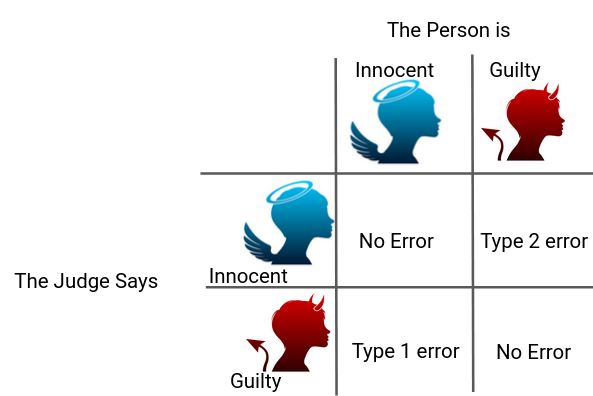